**Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label for 10 different classes.**

**The 10 classes are as follows:**  

*   0 => T-shirt/top
*   1 => Trouser
*   2 => Pullover
*   3 => Dress
*   4 => Coat
*   5 => Sandal
*   6 => Shirt
*   7 => Sneaker
*   8 => Bag
*   9 => Ankle boot

**Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.This pixel-value is an integer between 0 and 255.**



##**Importing the required libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


##**Loading the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_df = pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/fashion-mnist_test.csv')

##**Data Analysis** 

In [4]:
# Let's view the training dataset
train_df.head(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,6,2,0,0,0,0,0,0,0,2,3,7,4,4,5,5,0,0,0,0,0,0,4,5,4,5,11,2,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,2,4,9,7,8,7,5,4,8,12,5,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,0,0,0,159,161,143,180,142,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,...,255,231,241,217,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,36,50,51,68,48,48,33,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,0,60,234,215,229,223,231,107,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,224,...,0,0,0,2,0,77,210,204,156,0,0,0,0,0,0,1,76,88,35,0,0,2,5,7,3,3,3,3,7,5,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,0,0,1,0,0,141,45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,238,229,227,223,255,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,220,215,210,198,185,188,194,177,189,198,203,214,166,0,0,0,0,0,0,0


**It can be observed that the pixel information of each image is given in 784 columns starting from the second column. The first column contains the label of the class to which it belongs.**

In [5]:
# Let's view the testing dataset
test_df.head(20)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,0,0,0,0,0,0,0,0,0,0,0,34,68,34,0,0,0,0,0,0,0,0,0,34,136,102,105,98,74,64,...,129,122,125,139,132,132,10,0,0,0,0,0,0,0,0,0,0,0,0,23,57,105,108,115,125,125,122,122,125,119,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,0,0,108,25,0,0,0,132,54,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,61,102,...,146,196,197,136,215,42,0,3,0,0,0,0,0,0,0,0,0,0,1,0,82,172,159,150,140,142,164,160,153,202,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,75,192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,92,66,0,0,0,0,81,91,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,75,111,118,...,121,117,104,110,69,0,0,1,0,0,0,0,0,0,0,0,0,0,0,49,63,52,55,57,57,55,53,53,55,61,57,70,28,0,2,0,0,0,0,0


In [6]:
train_df.shape

(60000, 785)

**There are 60,000 datapoints i.e 60,000 images in the trainig dataset and 785 columns- 1 column containing the label and the rest 784 columns containing the pixel information.**

In [7]:
test_df.shape

(10000, 785)

**There are 60,000 datapoints i.e 10,000 images in the testing dataset and 785 columns- 1 column containing the label and the rest 784 columns containing the pixel information.**

In [8]:
# Create training and testing arrays

training = np.array(train_df, dtype = 'float32')
testing = np.array(test_df, dtype='float32')

In [9]:
training.shape

(60000, 785)

In [10]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
testing.shape

(10000, 785)

In [12]:
testing

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
names={0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4: 'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

##**Data Visulaization**

(-0.5, 27.5, 27.5, -0.5)

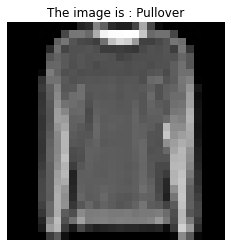

In [14]:
# Let's view an image!
i = random.randint(0,60000) # Select any random index 

c=training[i,0]
plt.title("The image is : "+names[c])
plt.imshow( training[i,1:].reshape((28,28)),cmap='gray' ) # Reshape and plot the image
plt.axis('off')

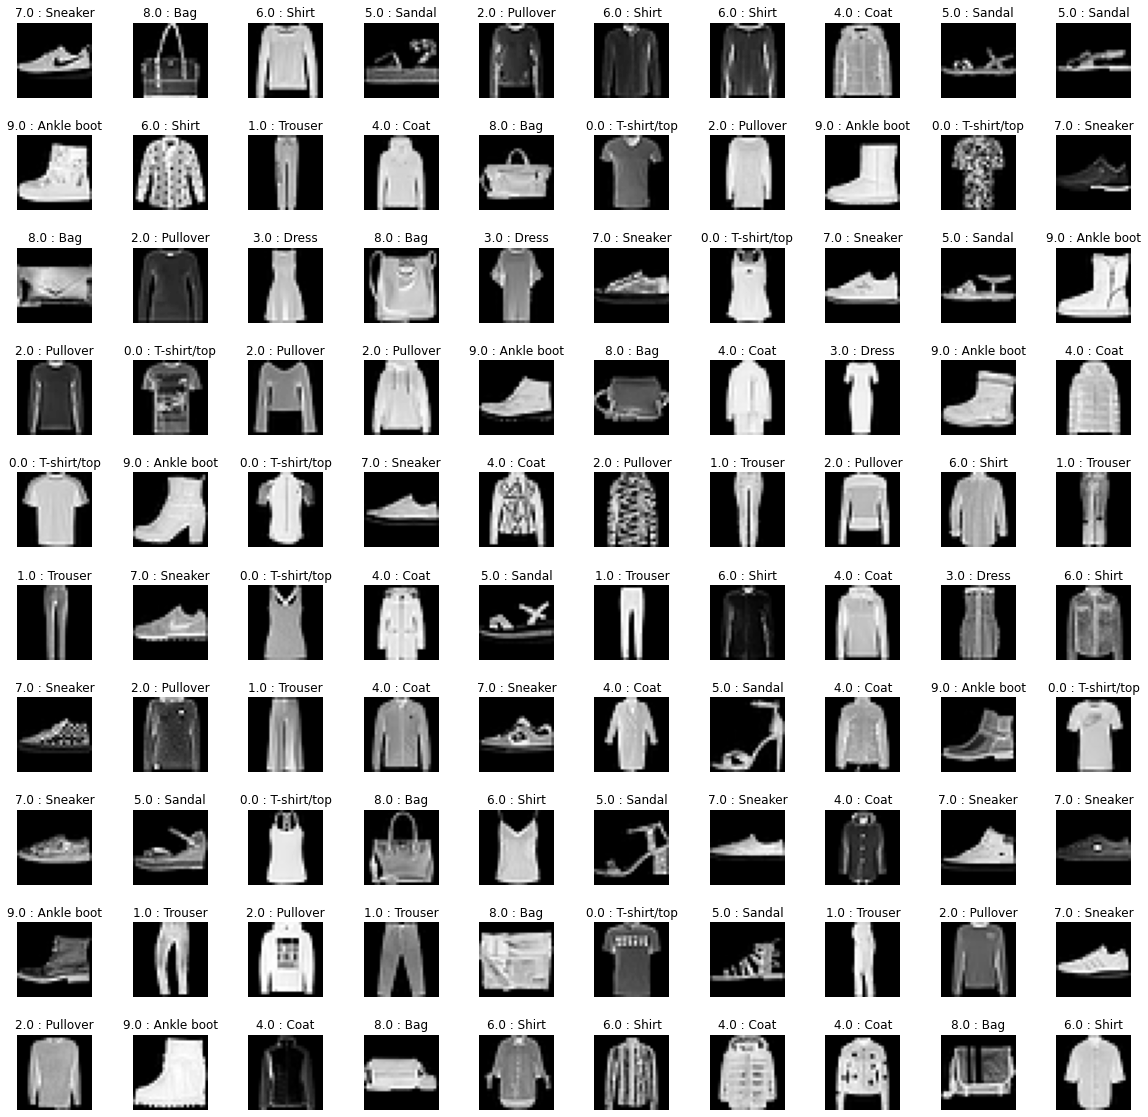

In [15]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 

W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))

axes = axes.ravel() # flatten the 10 x 10 matrix into 100 array

n_training = len(training) # Fetch the length of the training dataset

for i in np.arange(0, W_grid * L_grid): 

    index = np.random.randint(0, n_training) ## Select a random number

    # Read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)),cmap='gray' )
    c=training[index,0]
    text=str(c)+" : "+str(names[c])
    axes[i].set_title( text,fontsize = 12)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5) #The height of the padding between subplots, as a fraction of the average Axes width.
plt.subplots_adjust(wspace=0.5) #The width of the padding between subplots, as a fraction of the average Axes width.


##**Splitting the dataset**

In [16]:
# Splitting the data into X and Y

X = training[:,1:]/255 # Normalising the dataset
Y = training[:,0]

X_test = testing[:,1:]/255  # Normalising the dataset
Y_test = testing[:,0]

In [17]:
# Splitting the training data into traing and validation dataset
# 20% goes into the validation dataset

from sklearn.model_selection import train_test_split

X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size = 0.2, random_state = 12345)

In [18]:
X_train.shape

(48000, 784)

**80% of the dataset i.e 80% of 60,000= 48,000 datapoints came in the training dataset and 784 columns representing the 28*28 pixels in each image**

In [19]:
Y_train.shape

(48000,)

**80% of the dataset i.e 80% of 60,000= 48,000 datapoints came in the training dataset and 1 column here represents the label of each image**

In [20]:
X_validate.shape

(12000, 784)

**20% of the remaining dataset i.e 20% of 60,000= 12,000 datapoints came in the training dataset and 784 columns representing the 28*28 pixels in each image**

In [21]:
Y_validate.shape

(12000,)

**20% of the remaining dataset i.e 20% of 60,000= 12,000 datapoints came in the training dataset and 1 column represents the label of each image**

In [22]:
# Unpack the tuple
# CNN expects another dimension for the batch so we have to add that dimension at index=0 

X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [23]:
X_train.shape

(48000, 28, 28, 1)

In [24]:
X_test.shape

(10000, 28, 28, 1)

In [25]:
X_validate.shape

(12000, 28, 28, 1)

In [26]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_validate = to_categorical(Y_validate)

In [27]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

##**Defining the model architecture**

In [28]:
cnn_model = Sequential()


cnn_model.add(Conv2D(32,(3, 3),input_shape = (28,28,1),  activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(64,3, 3, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Flatten())

cnn_model.add(Dense(32, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'softmax'))


##**Complie the model**

In [29]:
cnn_model.compile(loss ='categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [30]:
#Returns the summary of the model

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                8

##**Training the model**

In [31]:
epochs = 50

history = cnn_model.fit(X_train,
                        Y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, Y_validate))



Epoch 1/50
94/94 [==============================] - 30s 160ms/step - loss: 1.8181 - accuracy: 0.3820 - val_loss: 0.6495 - val_accuracy: 0.7593
Epoch 2/50
94/94 [==============================] - 15s 154ms/step - loss: 0.6772 - accuracy: 0.7543 - val_loss: 0.5391 - val_accuracy: 0.8038
Epoch 3/50
94/94 [==============================] - 14s 154ms/step - loss: 0.5796 - accuracy: 0.7882 - val_loss: 0.4782 - val_accuracy: 0.8288
Epoch 4/50
94/94 [==============================] - 14s 154ms/step - loss: 0.5261 - accuracy: 0.8098 - val_loss: 0.4464 - val_accuracy: 0.8405
Epoch 5/50
94/94 [==============================] - 14s 153ms/step - loss: 0.4877 - accuracy: 0.8215 - val_loss: 0.4180 - val_accuracy: 0.8561
Epoch 6/50
94/94 [==============================] - 14s 154ms/step - loss: 0.4577 - accuracy: 0.8361 - val_loss: 0.4042 - val_accuracy: 0.8585
Epoch 7/50
94/94 [==============================] - 14s 154ms/step - loss: 0.4425 - accuracy: 0.8423 - val_loss: 0.3889 - val_accuracy: 0.8642

##**Evaluating the model**

In [32]:
evaluation = cnn_model.evaluate(X_test, Y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.2607 - accuracy: 0.9081
Test Accuracy : 0.908


In [33]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1, 2, ..., 8, 8, 1])

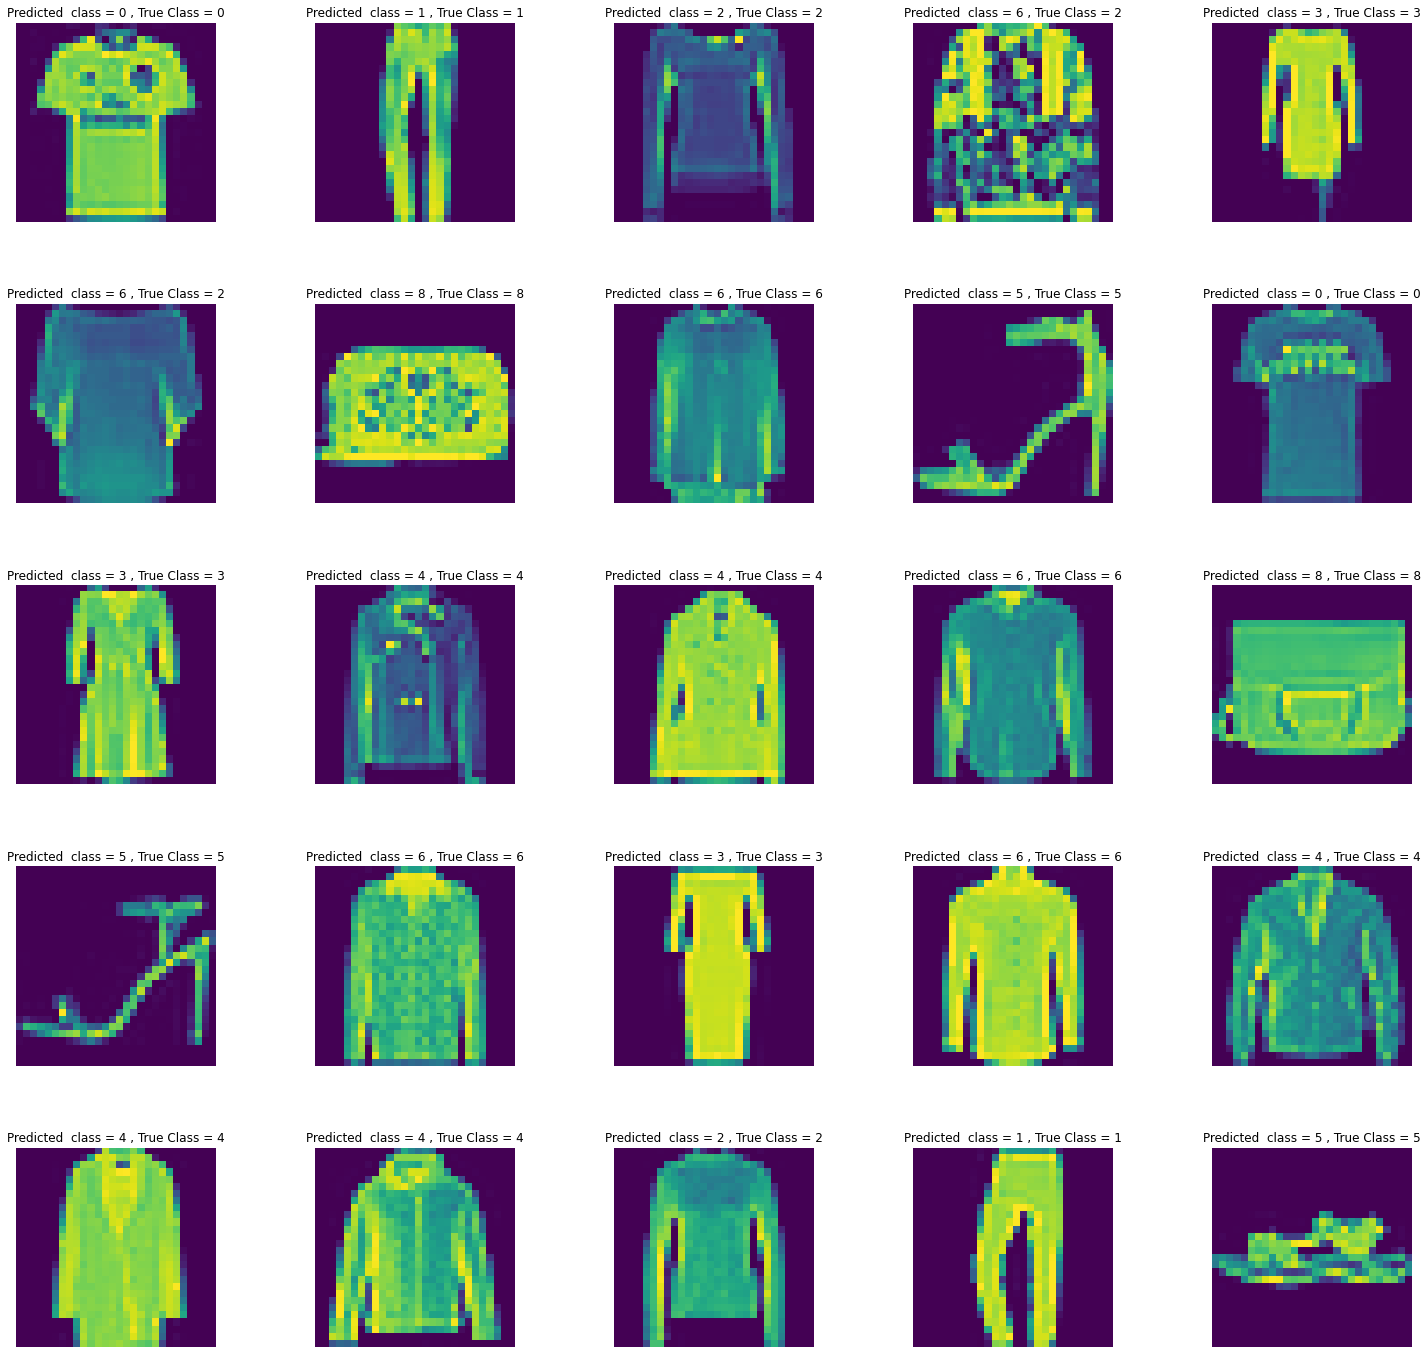

In [34]:
# Visualisng the true class and predicted class for the first 25 images

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (25,25))
axes = axes.ravel() # returns a flattened array

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    text="Predicted  class = "+str(predicted_classes[i])+" , True Class = "+str(np.argmax(Y_test[i])) 
    axes[i].set_title(text) 
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


Text(105.0, 0.5, 'True classes')

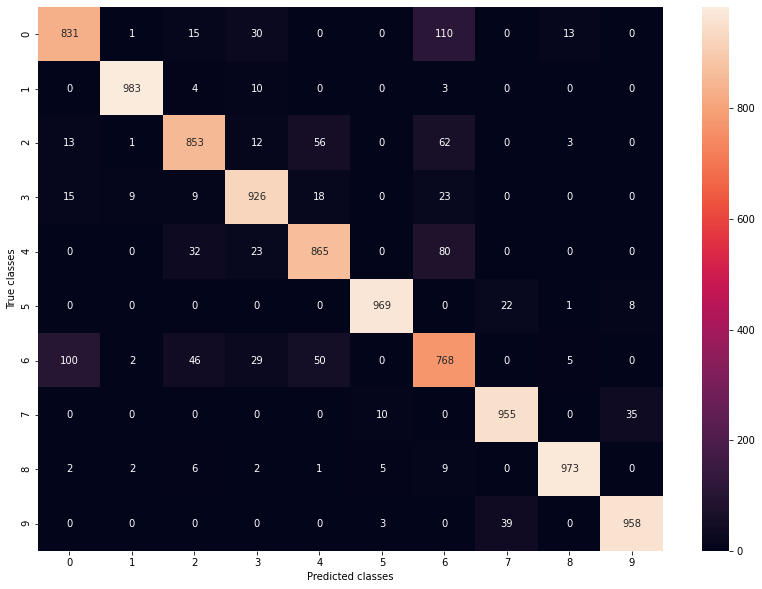

In [38]:
# Plotting the confusion matrix

from sklearn.metrics import confusion_matrix
import tensorflow as tf

label = tf.argmax(Y_test, axis = 1) # Since Y_test is the one hot encoded so we convert it back using argmax
cm = confusion_matrix(label, predicted_classes) 
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True,fmt='.0f')
plt.xlabel('Predicted classes')
plt.ylabel('True classes')

# Sum the diagonal element to get the total true correct values

**It can be observed that there exist high values along the diagonal which is good because it suggests that most of the predictions are correct. However, there re few classes where some misclassifications do exist like a lot of shirts(class 6) has been misclassified as T-shirt/Top(class 0) and vice versa. Similar misclassifications can be seen for some of the other classes.**

In [36]:
# Printing the classification report

from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(label, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.83      0.85      1000
     Class 1       0.98      0.98      0.98      1000
     Class 2       0.88      0.85      0.87      1000
     Class 3       0.90      0.93      0.91      1000
     Class 4       0.87      0.86      0.87      1000
     Class 5       0.98      0.97      0.98      1000
     Class 6       0.73      0.77      0.75      1000
     Class 7       0.94      0.95      0.95      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**It can be observed that there is a room for improvement. So modifications can be made to improve the performance of the model.**